## Take-Home Challenge: Ultimate Technologies Inc.

### Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions!

In [1]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

### Part 1 ‐ Exploratory data analysis

In [3]:
login_df = pd.read_json('logins.json')

In [4]:
login_df.set_index('login_time', inplace=True)

In [5]:
login_df['visited'] = 1

In [6]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   visited  93142 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


In [7]:
login_df.head()

,visited
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [8]:
m15_df = login_df.groupby(pd.Grouper(freq='15T')).count()

In [9]:
m15_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   visited  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [10]:
m15_df.head()

,visited
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


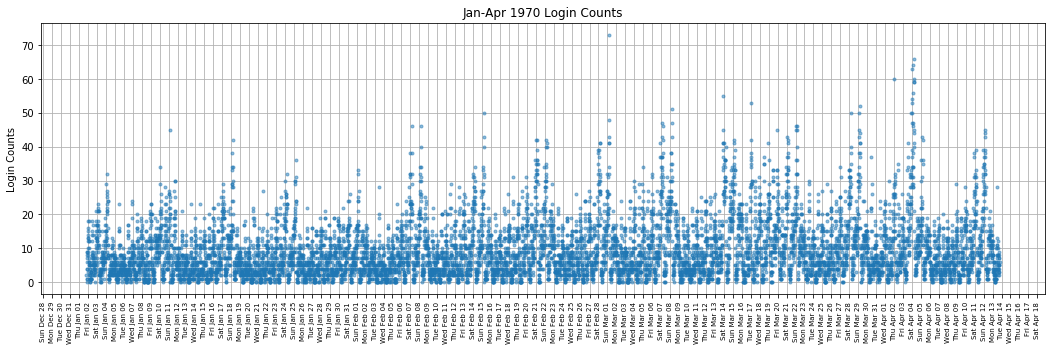

In [11]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.plot(m15_df['visited'], marker='.', alpha=0.5, linestyle='None')
ax.set_ylabel('Login Counts')
ax.set_title('Jan-Apr 1970 Login Counts')

# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.DayLocator())

# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a %b %d'))

# Turn on grid lines
ax.grid()

# Make xstick vertical
plt.xticks(fontsize=7, rotation='vertical');

There is seasonal pattern here, weekends tend to have triple logins compare the majority of logins below 10 counts

### Part 2 ‐ Experiment and metrics design

1. Key measurements can be calculated on daily or monthly basis:
   * Numbers of taxies registered from one city appear in another city aka numbers of crossed city taxies access the toll bridge
   * Timespan a taxi registered from one city spent in another city
   * Number of inner trips a crossed taxi won in another city
   * Percentage of taxies from Gotham at Metropolis during the week days
   * Percentage of taxies from Metropolis at Gotham during the week nights
   * Percentage of taxies from crossed cities the weekends
   

2. Practical implementation:
   * Data must include information to calculate above key measurements: 
     - what city a taxi registered
     - timestamp of outgoing and incoming toll transactions
     - trip pickup and dropoff locations and timestamps  
   * Use standard libraries like Pandas to aggregate data to fulfill the key measurements
   * Statistical tests:
     - Run these numbers against different discount percentages
     - Compare these numbers on daily, weekends, weekly, monthly, seasonal, annually, and special events
     - Visualize findings via different charts
   * Predicting models:
     - Use knowledge from above exploration and analysis to build models to predict best discount rates and times to maximize crossed taxies in both cities

### Part 3 ‐ Predictive modeling

#### Data exploration and cleanup

In [12]:
ultimate_df = pd.read_json('ultimate_data_challenge.json')

In [13]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Convert time based columns to datetime type

In [14]:
ultimate_df['signup_date'] = pd.to_datetime(ultimate_df['signup_date'])
ultimate_df['last_trip_date'] = pd.to_datetime(ultimate_df['last_trip_date'])

In [15]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [16]:
ultimate_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


How many cities?

In [17]:
ultimate_df['city'].value_counts()

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64

First and last days have user signed up?

In [18]:
ultimate_df['signup_date'].min()

Timestamp('2014-01-01 00:00:00')

In [19]:
ultimate_df['signup_date'].max()

Timestamp('2014-01-31 00:00:00')

First and last days of 'last_trip_date'?

In [20]:
ultimate_df['last_trip_date'].min()

Timestamp('2014-01-01 00:00:00')

In [21]:
ultimate_df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

How many rows have missing value on 'avg_rating_of_driver'?

In [22]:
ultimate_df[ultimate_df['avg_rating_of_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


There are about 16% of missing value on 'avg_rating_of_driver'

How many rows have missing value on 'avg_rating_by_driver'?

In [23]:
ultimate_df[ultimate_df['avg_rating_by_driver'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iPhone,0.0,False,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,NaN,1.0,2014-01-26,iPhone,0.0,False,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,Android,0.0,False,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iPhone,0.0,False,0.0,0.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49249,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iPhone,0.0,True,100.0,4.60,NaN
49376,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iPhone,0.0,False,100.0,3.01,NaN
49504,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,Android,0.0,False,100.0,0.75,NaN
49599,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iPhone,0.0,False,100.0,2.48,NaN


There are about 0.4% of missing value on 'avg_rating_by_driver'. So the total of missing data is less then 20%, # let drop rows without 'avg_rating_by_driver' or 'avg_rating_of_driver'

In [24]:
ultimate_df = ultimate_df[(ultimate_df['avg_rating_by_driver'].notna()) & (ultimate_df['avg_rating_of_driver'].notna())]

In [25]:
ultimate_df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,2014-01-03,4.8,1.11,2014-07-01,iPhone,11.1,True,55.6,2.53,4.7
49994,Astapor,1,2014-01-03,4.6,1.44,2014-05-31,iPhone,37.5,False,25.0,2.25,4.5
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0


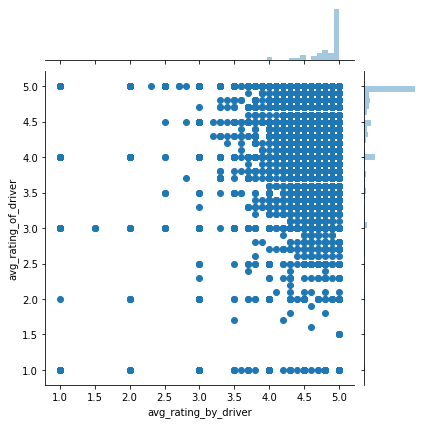

In [26]:
# let plot distributions to see how they are correlated 
sns.jointplot(x='avg_rating_by_driver', y='avg_rating_of_driver', data=ultimate_df);

How many rows have missing value on 'phone'? How many kinds of phone types?

In [27]:
ultimate_df[ultimate_df['phone'].isna()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49568,Winterfell,2,2014-01-11,5.0,1.00,2014-01-12,None,0.0,True,0.0,5.01,5.0
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [28]:
ultimate_df['phone'].value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [29]:
# let add the 3rd type of phone: Unknown
ultimate_df.loc[ultimate_df['phone'].isna(), 'phone'] = 'Unknown'

In [30]:
ultimate_df['phone'].value_counts()

iPhone     29352
Android    12093
Unknown      299
Name: phone, dtype: int64

#### Prepare data for training and test sets



Add a label column called 'active' and fill it with 1 if its 'last_trip_date' is in Jun or after

In [31]:
ultimate_df['active'] = 0
ultimate_df.loc[ultimate_df['last_trip_date'].dt.month >= 6, 'active'] = 1

Since all 'signup_date' are in Jan 2014, let just keep the day

In [32]:
ultimate_df['signup_day'] = ultimate_df['signup_date'].dt.day
ultimate_df.drop('signup_date', axis=1, inplace=True)

Since all 'last_trip_date' is used for setting 'active', it should not be a feature, let drop it

In [33]:
ultimate_df.drop('last_trip_date', axis=1, inplace=True)

In [34]:
ultimate_df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,signup_day
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1,25
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,29
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,6
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,10
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
49993,Astapor,3,4.8,1.11,iPhone,11.1,True,55.6,2.53,4.7,1,3
49994,Astapor,1,4.6,1.44,iPhone,37.5,False,25.0,2.25,4.5,0,3
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,1,25
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0,31


In [35]:
ultimate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41744 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41744 non-null  object 
 1   trips_in_first_30_days  41744 non-null  int64  
 2   avg_rating_of_driver    41744 non-null  float64
 3   avg_surge               41744 non-null  float64
 4   phone                   41744 non-null  object 
 5   surge_pct               41744 non-null  float64
 6   ultimate_black_user     41744 non-null  bool   
 7   weekday_pct             41744 non-null  float64
 8   avg_dist                41744 non-null  float64
 9   avg_rating_by_driver    41744 non-null  float64
 10  active                  41744 non-null  int64  
 11  signup_day              41744 non-null  int64  
dtypes: bool(1), float64(6), int64(3), object(2)
memory usage: 3.9+ MB


In [36]:
from sklearn.model_selection import train_test_split

X = ultimate_df[ultimate_df.columns.difference(['active'])]
y = ultimate_df['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12, stratify=y)

In [37]:
boolean_features = X_train.select_dtypes(include=['bool']).columns

boolean_features

Index(['ultimate_black_user'], dtype='object')

In [38]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

numeric_features

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'signup_day', 'surge_pct', 'trips_in_first_30_days', 'weekday_pct'],
      dtype='object')

In [39]:
categorical_features = X_train.select_dtypes(include=['object']).columns

categorical_features

Index(['city', 'phone'], dtype='object')

#### Modeling

Try out different classification algorithms

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [41]:
# custom transformers
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
        
        
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])


class StringIndexer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.apply(lambda s: s.cat.codes.replace(
            {-1: len(s.cat.categories)}
        ))

In [42]:
# build a pipeline to normalize numerical columns and one-hot encoding categorical ones
pipeline = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # booleans close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('scaler', StandardScaler()),
        ])),  # numericals close
        
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('labeler', StringIndexer()),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categoricals close
    ])),  # features close
    ('clf', LogisticRegression()),  # classifier
])  # pipeline close

In [43]:
# run different classification lgorithms in the pipeline
clfs = [
    LogisticRegression(),
    SVC(kernel='rbf'),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
]

for clf in clfs:
    pipeline.set_params(clf=clf)
    scores = cross_validate(pipeline, X_train, y_train)
    print('===================================')
    print(str(clf))
    print('----------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
----------------
fit_time  mean  0.046393632888793945
fit_time  std  0.0017736121456523631
score_time  mean  0.006026935577392578
score_time  std  0.0002889710840749019
test_score  mean  0.6551360490238554
test_score  std  0.0022826701520522294
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
----------------
fit_time  mean  18.84282088279724
fit_time  std  0.3228981274830949
score_time  mean  2.8385271072387694
score_time  std  0.0889970714948725
test_score  mean  0.7

GradientBoostingClassifier has the highest test_score mean 74%

In [44]:
# Let fine tune hyper parameters for GradientBoostingClassifier
# Based on https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

gbc = GradientBoostingClassifier(min_samples_split=150,  # 0.5% of total rows in training
                                 max_depth=6,  # the value should be from 5 to 8, 31K training rows -> 5
                                 max_features='sqrt',  # general thumb-rule to start with square root
                                 subsample = 0.8,  # good starting point
                                 random_state=10
                                )

pipeline.set_params(clf=gbc)

grid = GridSearchCV(pipeline, param_grid={  # clf__ is needed to refer to the clf part of the pipeline
    'clf__n_estimators': np.arange(20, 81, 10),  
    'clf__min_samples_leaf': np.arange(40, 61, 10),
})

In [45]:
model = grid.fit(X_train, y_train)

In [46]:
grid.best_params_

{'clf__min_samples_leaf': 60, 'clf__n_estimators': 80}

In [47]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('features',
                 FeatureUnion(n_jobs=1,
                              transformer_list=[('boolean',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TypeSelector(dtype='bool'))],
                                                          verbose=False)),
                                                ('numericals',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  TypeSelector(dtype=<class 'numpy.number'>)),
                                                                 ('scaler',
                                                                  StandardScaler(copy=True,
                                      

In [48]:
grid.best_score_

0.7474765970499395

In [49]:
y_predict = model.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test,y_predict)
print('Prediction accuracy of the best classifier after CV is %.2f%%' % (accuracy * 100))

Prediction accuracy of the best classifier after CV is 74.32%


In [51]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79      6146
           1       0.72      0.62      0.67      4290

    accuracy                           0.74     10436
   macro avg       0.74      0.72      0.73     10436
weighted avg       0.74      0.74      0.74     10436



#### Figure out important features to help Ultimate Inc. to improve long-term rider retention

In [52]:
from sklearn.inspection import permutation_importance

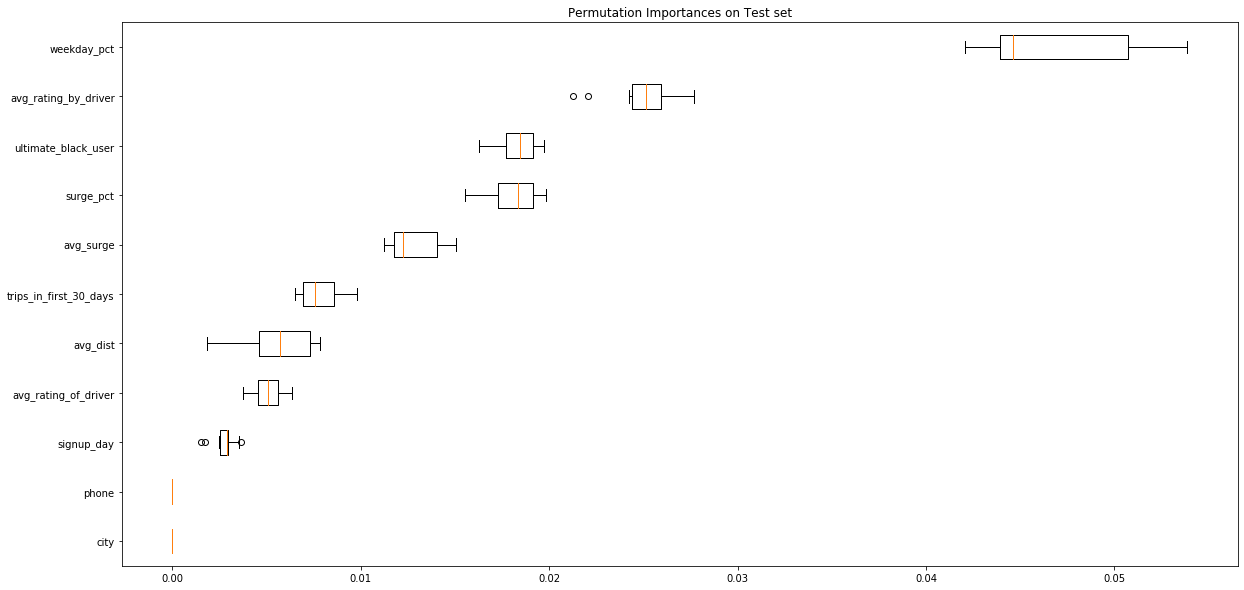

In [54]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 10))
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances on Test set");

Three main features can boost retension:

1. Increase percent of weekday trip ('weekday_pct'): more discount on weekdays
2. Increase riders' experience ('avg_rating_by_driver'): car cleanliness, driver friendliness and honesty, short waiting time, reasonalbe fares, etc.
3. Promote for more Ultimate Black ridersin their first 30 days after signing up